directly do high level clustering

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import anndata as ad 
import scanpy as sc
sys.path.append("../../")
import utils
from sklearn.decomposition import PCA
import umap
import graph
import visualize
import utils
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(12, 12), dpi=150)
from pySankey import sankey

<Figure size 1800x1800 with 0 Axes>

In [4]:
sys.executable

'/home/bkzhu/python/miniconda3/envs/spatial_cluster/bin/python3'

In [5]:
cnngnn_embed = np.load("/home/bkzhu/spatial_clustering/phase3/spatial-clust-scripts-main/data/tonsil/cnn_l2_layer6_epoch400_gnn_embedding_dim32.npy")
pd.DataFrame(cnngnn_embed)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.012568,0.383671,0.279387,0.310422,-0.509269,-0.645675,-0.196466,-1.129342,-0.934444,-1.004101,...,-3.152242,-1.483012,-1.376516,-1.195076,0.251169,-0.697576,-1.516410,0.406506,0.058169,-0.061517
1,-0.080315,0.786280,0.230948,-0.406803,-1.204053,0.350500,-0.076609,-1.876641,-1.696140,-1.518976,...,-2.605878,-0.950238,-0.975694,-1.144947,0.324813,-0.287140,-2.256661,0.223205,0.181943,-0.121894
2,-0.104437,0.224400,-0.055576,0.305960,-0.906478,-1.306515,-0.451383,-1.226986,-1.237540,-0.811377,...,-1.651242,-1.309256,-2.037105,-1.668333,0.559618,-0.178235,-1.006973,0.272933,-0.123702,-0.001210
3,1.149648,-0.332147,0.099455,-2.107372,-2.355982,-2.621508,0.813073,-0.362954,-1.357949,-2.459640,...,-5.466854,-0.307233,-0.426422,-3.015889,-0.163884,-0.034132,-3.284946,1.333288,-0.180360,-0.386115
4,0.204626,-0.196506,-0.125809,-1.226002,-1.227033,-0.735613,0.477824,-1.345397,-1.323201,-1.803361,...,-2.857459,-0.452004,-0.941106,-1.945527,0.091950,-0.229202,-1.551059,0.363032,-0.237236,-0.927926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102569,0.614572,0.718447,0.736662,-0.272249,-1.514546,-0.628154,-0.428124,-3.083605,-1.290762,-2.059950,...,-1.725856,-2.768835,-0.971071,-1.446440,0.723958,-0.695566,-3.113721,0.292544,-0.133729,-1.072274
102570,0.119420,0.365225,0.537121,0.098008,-1.188331,-1.336868,0.156001,-1.457191,-0.845831,-1.536605,...,-2.408038,-2.062058,-0.880751,-0.791906,0.513670,-0.451893,-1.749971,0.494355,0.201267,-0.032163
102571,0.438820,1.041901,0.419260,-0.335811,-1.254405,0.095804,-0.274948,-2.170161,-1.609665,-1.747990,...,-2.329148,-1.061911,-1.019108,-1.162909,0.543818,-0.273684,-2.356598,0.338506,0.145321,-0.152556
102572,0.653305,0.533476,0.353568,0.352690,-1.035957,-1.653049,-0.506606,-1.916253,-0.254836,-2.113180,...,-1.094327,-2.296806,-1.504728,-1.777841,0.372215,-0.218420,-2.493037,0.397588,0.639993,-0.165061


In [6]:
train_mask = np.load("/home/bkzhu/spatial_clustering/phase3/spatial-clust-scripts-main/data/tonsil/train_mask_tonsil.npy")
pd.DataFrame(train_mask)

,0
0,True
1,True
2,True
3,True
4,True
...,...
102569,True
102570,True
102571,True
102572,True


In [7]:
cnngnn_embed[train_mask,:].shape

(82059, 32)

In [8]:
df = pd.read_csv("/home/bkzhu/spatial_clustering/phase2/data/tonsil/results/all_clusters.csv")
df

,Unnamed: 0,cellLabelInImage,cellSize,HOECHST1,CD38,CD19,CD31,Vimentin,CD22,Ki67,...,CD40,CD274,CD27,CD104,CD273,FAPalpha,Ecadherin,PointNum,cluster.term,seurat_res1.0
0,1,1,45,7577.133333,0.042709,0.126471,0.013933,0.167720,0.378127,0.022083,...,0.193192,0.041146,0.017326,0.016006,0.021456,0.000000,0.294373,reg001_X02_Y05_Z09,B-CD22-CD40,4
1,2,2,67,5689.014925,0.411814,0.274831,0.078204,0.242115,0.732288,0.032531,...,0.354364,0.761689,0.296546,0.046936,0.242958,0.195214,0.518544,reg001_X02_Y05_Z09,B-CD22-CD40,8
2,3,3,54,2918.629630,0.181537,0.049070,0.107920,0.256650,0.136265,0.046391,...,0.000000,0.821606,0.029158,0.066806,0.087647,0.168854,0.798743,reg001_X02_Y05_Z09,Fibro/Epi,15
3,4,4,50,3278.380000,0.282974,0.156094,1.000000,0.404116,0.176384,0.037308,...,1.000000,1.000000,0.131914,0.101283,0.387117,0.594447,0.781700,reg001_X02_Y05_Z09,mix,16
4,5,5,40,3712.550000,0.105352,0.355472,0.123463,1.000000,0.244163,0.039550,...,0.397868,0.236057,0.024758,0.139895,0.123207,0.769419,0.384925,reg001_X02_Y05_Z09,B-CD22-CD40,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371080,375978,3513,70,4149.171000,0.000000,0.026146,0.001722,0.611818,0.000000,0.021935,...,0.076047,0.115173,0.710638,0.074332,0.171887,0.302279,0.128266,reg001_X10_Y15_Z04,CD4 T,1
371081,375979,3514,51,1196.824000,0.750703,0.043029,0.577087,0.154900,0.031831,0.030165,...,1.000000,1.000000,0.000000,0.149224,1.000000,1.000000,0.720069,reg001_X10_Y15_Z04,Fibro/Epi,9
371082,375980,3515,38,2536.632000,0.000000,0.130797,0.000000,0.000000,0.000000,0.016872,...,0.000000,0.000000,1.000000,0.032043,0.000000,0.000000,0.000000,reg001_X10_Y15_Z04,Plasma,10
371083,375981,3516,34,4547.529000,0.404353,0.260548,0.073022,0.436796,0.641083,0.030313,...,0.691102,0.285852,0.617927,0.076619,0.205713,0.219130,0.188265,reg001_X10_Y15_Z04,B-CD22-CD40,8


In [9]:
df['cluster.term'].value_counts()

B-CD22-CD40    106411
CD4 T           56286
B-Ki67          47878
Other           36907
Fibro/Epi       36562
CD8 T           26809
mix             20840
Plasma          16304
Vessel          11683
Mono             7141
DC               4264
Name: cluster.term, dtype: int64

In [10]:
df['PointNum'].str.split('_',expand=True)

,0,1,2,3
0,reg001,X02,Y05,Z09
1,reg001,X02,Y05,Z09
2,reg001,X02,Y05,Z09
3,reg001,X02,Y05,Z09
4,reg001,X02,Y05,Z09
...,...,...,...,...
371080,reg001,X10,Y15,Z04
371081,reg001,X10,Y15,Z04
371082,reg001,X10,Y15,Z04
371083,reg001,X10,Y15,Z04


In [11]:
df['xreg'] = df['PointNum'].str.split('_',expand=True)[1].str[1:].astype(int)
df['yreg'] = df['PointNum'].str.split('_',expand=True)[2].str[1:].astype(int)
df

,Unnamed: 0,cellLabelInImage,cellSize,HOECHST1,CD38,CD19,CD31,Vimentin,CD22,Ki67,...,CD27,CD104,CD273,FAPalpha,Ecadherin,PointNum,cluster.term,seurat_res1.0,xreg,yreg
0,1,1,45,7577.133333,0.042709,0.126471,0.013933,0.167720,0.378127,0.022083,...,0.017326,0.016006,0.021456,0.000000,0.294373,reg001_X02_Y05_Z09,B-CD22-CD40,4,2,5
1,2,2,67,5689.014925,0.411814,0.274831,0.078204,0.242115,0.732288,0.032531,...,0.296546,0.046936,0.242958,0.195214,0.518544,reg001_X02_Y05_Z09,B-CD22-CD40,8,2,5
2,3,3,54,2918.629630,0.181537,0.049070,0.107920,0.256650,0.136265,0.046391,...,0.029158,0.066806,0.087647,0.168854,0.798743,reg001_X02_Y05_Z09,Fibro/Epi,15,2,5
3,4,4,50,3278.380000,0.282974,0.156094,1.000000,0.404116,0.176384,0.037308,...,0.131914,0.101283,0.387117,0.594447,0.781700,reg001_X02_Y05_Z09,mix,16,2,5
4,5,5,40,3712.550000,0.105352,0.355472,0.123463,1.000000,0.244163,0.039550,...,0.024758,0.139895,0.123207,0.769419,0.384925,reg001_X02_Y05_Z09,B-CD22-CD40,7,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371080,375978,3513,70,4149.171000,0.000000,0.026146,0.001722,0.611818,0.000000,0.021935,...,0.710638,0.074332,0.171887,0.302279,0.128266,reg001_X10_Y15_Z04,CD4 T,1,10,15
371081,375979,3514,51,1196.824000,0.750703,0.043029,0.577087,0.154900,0.031831,0.030165,...,0.000000,0.149224,1.000000,1.000000,0.720069,reg001_X10_Y15_Z04,Fibro/Epi,9,10,15
371082,375980,3515,38,2536.632000,0.000000,0.130797,0.000000,0.000000,0.000000,0.016872,...,1.000000,0.032043,0.000000,0.000000,0.000000,reg001_X10_Y15_Z04,Plasma,10,10,15
371083,375981,3516,34,4547.529000,0.404353,0.260548,0.073022,0.436796,0.641083,0.030313,...,0.617927,0.076619,0.205713,0.219130,0.188265,reg001_X10_Y15_Z04,B-CD22-CD40,8,10,15


In [12]:
df_sub = df.loc[(df.yreg >= 8) & (df.yreg <= 13) & (df.xreg <= 8) & (df.xreg >= 4),:]
df_sub = df_sub.loc[~df_sub['cluster.term'].isin(['mix','Other']),:]
df_sub

,Unnamed: 0,cellLabelInImage,cellSize,HOECHST1,CD38,CD19,CD31,Vimentin,CD22,Ki67,...,CD27,CD104,CD273,FAPalpha,Ecadherin,PointNum,cluster.term,seurat_res1.0,xreg,yreg
98925,100323,1,32,6217.750000,0.059920,0.654999,0.032532,0.005859,1.000000,0.014643,...,0.371972,0.094049,0.012020,0.029262,0.149702,reg001_X04_Y08_Z08,B-CD22-CD40,8,4,8
98926,100325,3,36,7420.944444,0.022436,0.000000,0.042907,0.082692,0.000000,0.041960,...,0.354276,0.032645,0.010791,0.167671,0.039669,reg001_X04_Y08_Z08,CD8 T,2,4,8
98927,100326,4,69,3705.710145,0.024005,0.323413,0.010868,0.450219,0.166603,0.396156,...,0.032551,0.045545,0.016825,0.163844,0.166694,reg001_X04_Y08_Z08,B-Ki67,5,4,8
98928,100327,5,90,4915.988889,1.000000,0.156977,1.000000,0.476991,0.060118,0.048008,...,1.000000,0.037174,0.275244,0.394651,1.000000,reg001_X04_Y08_Z08,Plasma,10,4,8
98929,100328,6,52,3826.634615,0.620176,0.205964,0.707579,0.059099,0.148487,0.030935,...,0.240319,0.005686,0.760503,0.261925,0.236684,reg001_X04_Y08_Z08,CD8 T,2,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295473,299386,4283,82,7595.293000,0.070159,0.034225,0.252578,0.148361,0.007585,0.025806,...,0.643266,0.049605,0.988690,0.341328,0.071670,reg001_X08_Y13_Z06,CD4 T,1,8,13
295476,299390,4287,68,7144.544000,0.145626,0.156322,0.000000,0.008159,0.027210,0.121517,...,1.000000,0.031506,0.133935,0.401330,0.136000,reg001_X08_Y13_Z06,CD4 T,1,8,13
295477,299391,4288,66,6458.879000,0.082013,0.095079,0.100886,0.249687,0.000000,0.000000,...,0.785736,0.077569,0.139753,0.373069,0.345597,reg001_X08_Y13_Z06,CD8 T,2,8,13
295478,299392,4289,39,9452.154000,0.195504,0.145446,0.000000,0.850321,0.043705,0.036657,...,0.745500,0.044353,0.437647,0.253913,0.324937,reg001_X08_Y13_Z06,CD4 T,1,8,13


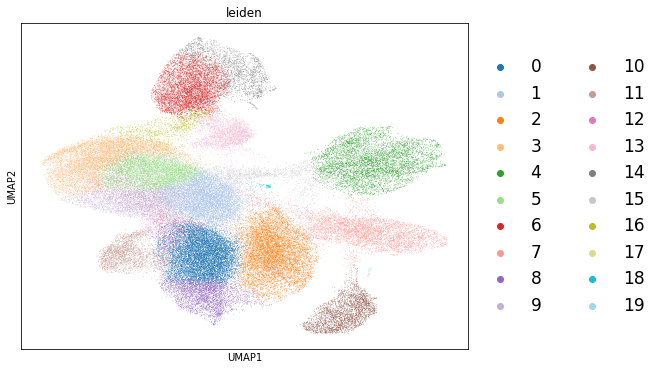

In [13]:
cnngnn_adata = ad.AnnData(utils.drop_zero_variability_columns(cnngnn_embed[train_mask,:]))
sc.pp.scale(cnngnn_adata)
sc.pp.neighbors(cnngnn_adata, n_neighbors=15, use_rep='X')
sc.tl.umap(cnngnn_adata)
sc.tl.leiden(cnngnn_adata, resolution=1)
# plot
plt.rcParams["figure.figsize"] = (8, 6)
sc.pl.umap(cnngnn_adata, color='leiden', legend_fontsize=17, show=False, palette='tab20')

/tmp/ipykernel_6811/3502658013.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['cnngnn_label_res1'] = cnngnn_adata.obs['leiden'].values


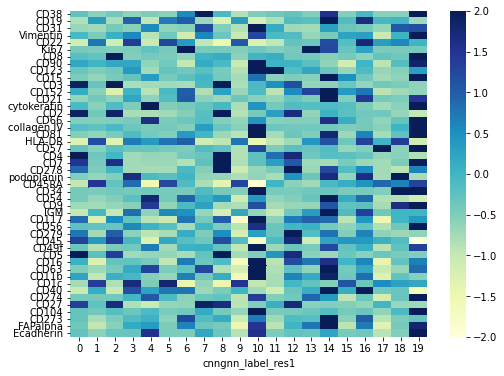

In [14]:
# annotate based on feature expressions
from scipy import stats
df_train = df_sub.loc[train_mask,:]
df_train['cnngnn_label_res1'] = cnngnn_adata.obs['leiden'].values
tmp = df_train.groupby(by='cnngnn_label_res1').mean()
tmp = tmp.drop(['Unnamed: 0', 'cellLabelInImage', 'cellSize', 'HOECHST1',
                'seurat_res1.0', 'xreg', 'yreg'], axis=1)
sns.heatmap((stats.zscore(tmp, axis=0, ddof=0)).T, cmap="YlGnBu", vmin=-2, vmax=2, yticklabels=True)

/tmp/ipykernel_6811/2260130921.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  feature_adata = ad.AnnData(df_train.iloc[:,4:-6]) # remove meta info
/home/bkzhu/python/miniconda3/envs/spatial_cluster/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


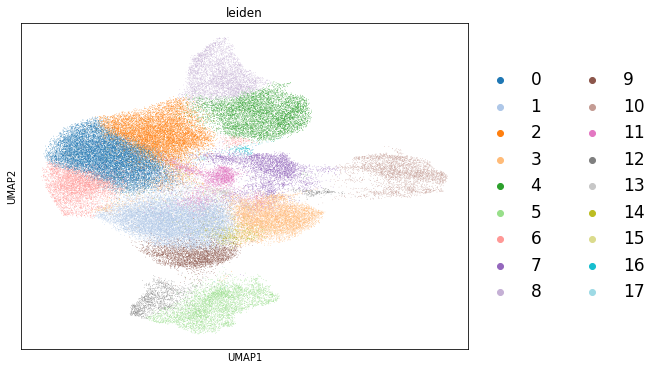

In [15]:
feature_adata = ad.AnnData(df_train.iloc[:,4:-6]) # remove meta info
sc.pp.scale(feature_adata)
sc.pp.neighbors(feature_adata, n_neighbors=15, use_rep='X')
sc.tl.umap(feature_adata)
sc.tl.leiden(feature_adata, resolution=1)
# plot
plt.rcParams["figure.figsize"] = (8, 6)
sc.pl.umap(feature_adata, color='leiden', legend_fontsize=17, show=False, palette='tab20')

/tmp/ipykernel_6811/1008913447.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['feature_label'] = feature_adata.obs['leiden'].values


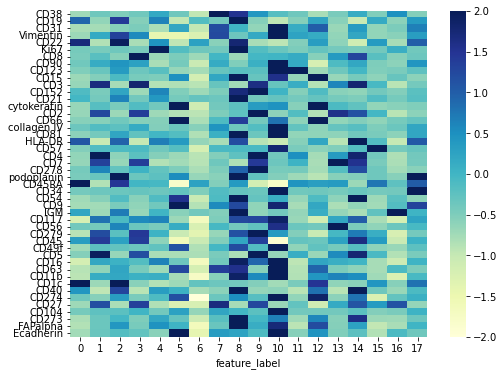

In [16]:
# annotate based on feature expressions
from scipy import stats
df_train['feature_label'] = feature_adata.obs['leiden'].values
tmp = df_train.groupby(by='feature_label').mean()
tmp = tmp.drop(['Unnamed: 0', 'cellLabelInImage', 'cellSize', 'HOECHST1',
                'seurat_res1.0', 'xreg', 'yreg'], axis=1)
sns.heatmap((stats.zscore(tmp, axis=0, ddof=0)).T, cmap="YlGnBu", vmin=-2, vmax=2, yticklabels=True)

In [36]:
# add ann for cnngnn
df_train['cnngnn_annotation1'] = df_train['cnngnn_label_res1']

new_cluster_names = {
    '0':'CD4', '1':'B', '2':'CD8', '3':'B', '4':'firbro/epi', '5':'B',
    '6':'gcB', '7':'plasma', '8':'CD4', '9':'B','10':'Vessel', '11':'DC', '12':'CD4',
    '13':'gcB', '14':'Neutrophil', '15':'B', '16':'B', '17':'NK', '18':'Vessel', '19':'mix'
}
df_train=df_train.replace({"cnngnn_annotation1": new_cluster_names})
df_train

,Unnamed: 0,cellLabelInImage,cellSize,HOECHST1,CD38,CD19,CD31,Vimentin,CD22,Ki67,...,cluster.term,seurat_res1.0,xreg,yreg,cnngnn_label_res1,feature_label,cnngnn_annotation1,feature_annotation1,res1_flow,res03_flow
98925,100323,1,32,6217.750000,0.059920,0.654999,0.032532,0.005859,1.000000,0.014643,...,B-CD22-CD40,8,4,8,1,0,B,B,None,NaN
98926,100325,3,36,7420.944444,0.022436,0.000000,0.042907,0.082692,0.000000,0.041960,...,CD8 T,2,4,8,2,3,CD8,CD8,None,NaN
98927,100326,4,69,3705.710145,0.024005,0.323413,0.010868,0.450219,0.166603,0.396156,...,B-Ki67,5,4,8,13,6,gcB,B,None,NaN
98928,100327,5,90,4915.988889,1.000000,0.156977,1.000000,0.476991,0.060118,0.048008,...,Plasma,10,4,8,7,7,plasma,plasma,None,NaN
98929,100328,6,52,3826.634615,0.620176,0.205964,0.707579,0.059099,0.148487,0.030935,...,CD8 T,2,4,8,7,14,plasma,Tmix,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295473,299386,4283,82,7595.293000,0.070159,0.034225,0.252578,0.148361,0.007585,0.025806,...,CD4 T,1,8,13,8,14,CD4,Tmix,None,NaN
295476,299390,4287,68,7144.544000,0.145626,0.156322,0.000000,0.008159,0.027210,0.121517,...,CD4 T,1,8,13,0,1,CD4,CD4,None,NaN
295477,299391,4288,66,6458.879000,0.082013,0.095079,0.100886,0.249687,0.000000,0.000000,...,CD8 T,2,8,13,2,3,CD8,CD8,None,NaN
295478,299392,4289,39,9452.154000,0.195504,0.145446,0.000000,0.850321,0.043705,0.036657,...,CD4 T,1,8,13,0,1,CD4,CD4,None,NaN


In [37]:
# add ann for cnngnn
df_train['feature_annotation1'] = df_train['feature_label']

new_cluster_names = {
    '0':'B', '1':'CD4', '2':'B', '3':'CD8', '4':'gcB', '5':'firbro/epi',
    '6':'B', '7':'plasma', '8':'gcB', '9':'CD4','10':'Vessel', '11':'DC', '12':'Neutrophil',
    '13':'Tmix', '14':'Tmix', '15':'NK', '16':'B', '17':'Vessel'
}
df_train=df_train.replace({"feature_annotation1": new_cluster_names})
df_train

,Unnamed: 0,cellLabelInImage,cellSize,HOECHST1,CD38,CD19,CD31,Vimentin,CD22,Ki67,...,cluster.term,seurat_res1.0,xreg,yreg,cnngnn_label_res1,feature_label,cnngnn_annotation1,feature_annotation1,res1_flow,res03_flow
98925,100323,1,32,6217.750000,0.059920,0.654999,0.032532,0.005859,1.000000,0.014643,...,B-CD22-CD40,8,4,8,1,0,B,B,None,NaN
98926,100325,3,36,7420.944444,0.022436,0.000000,0.042907,0.082692,0.000000,0.041960,...,CD8 T,2,4,8,2,3,CD8,CD8,None,NaN
98927,100326,4,69,3705.710145,0.024005,0.323413,0.010868,0.450219,0.166603,0.396156,...,B-Ki67,5,4,8,13,6,gcB,B,None,NaN
98928,100327,5,90,4915.988889,1.000000,0.156977,1.000000,0.476991,0.060118,0.048008,...,Plasma,10,4,8,7,7,plasma,plasma,None,NaN
98929,100328,6,52,3826.634615,0.620176,0.205964,0.707579,0.059099,0.148487,0.030935,...,CD8 T,2,4,8,7,14,plasma,Tmix,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295473,299386,4283,82,7595.293000,0.070159,0.034225,0.252578,0.148361,0.007585,0.025806,...,CD4 T,1,8,13,8,14,CD4,Tmix,None,NaN
295476,299390,4287,68,7144.544000,0.145626,0.156322,0.000000,0.008159,0.027210,0.121517,...,CD4 T,1,8,13,0,1,CD4,CD4,None,NaN
295477,299391,4288,66,6458.879000,0.082013,0.095079,0.100886,0.249687,0.000000,0.000000,...,CD8 T,2,8,13,2,3,CD8,CD8,None,NaN
295478,299392,4289,39,9452.154000,0.195504,0.145446,0.000000,0.850321,0.043705,0.036657,...,CD4 T,1,8,13,0,1,CD4,CD4,None,NaN


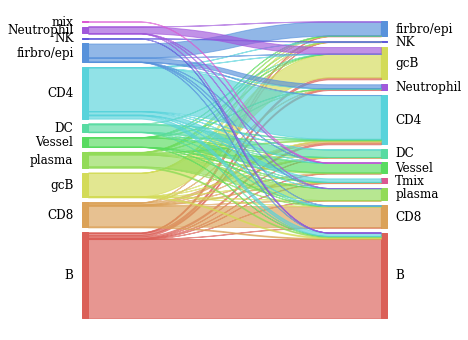

In [38]:
sankey.sankey(
    df_train['cnngnn_annotation1'], df_train['feature_annotation1'], aspect=20,
    fontsize=12
)

In [53]:
df_train['res1_flow'] = "None"

n2gc_idx = (df_train['cnngnn_annotation1'] == 'Neutrophil') & (df_train['feature_annotation1'] == 'gcB')
df_train.loc[n2gc_idx,'res1_flow'] = 'n2gc'


#### the confident ones
cfdb_idx = (df_train['cnngnn_annotation1'] == 'B') & (df_train['feature_annotation1'] == 'B')
df_train.loc[cfdb_idx,'res1_flow'] = 'cfdB'

cfdgcb_idx = (df_train['cnngnn_annotation1'] == 'gcB') & (df_train['cnngnn_annotation1'] == 'gcB')
df_train.loc[cfdgcb_idx,'res1_flow'] = 'cfdgcB'

cfdmph_idx = (df_train['cnngnn_annotation1'] == 'Mphage') & (df_train['cnngnn_annotation1'] == 'Mphage')
df_train.loc[cfdmph_idx,'res1_flow'] = 'cfdMphage'

cfdcd4_idx = (df_train['cnngnn_annotation1'] == 'CD4') & (df_train['feature_annotation1'] == "CD4")
df_train.loc[cfdcd4_idx,'res1_flow'] = 'cfdCD4'

cfdcd8_idx = (df_train['cnngnn_annotation1'] == 'CD8') & (df_train['feature_annotation1'] == 'CD8')
df_train.loc[cfdcd8_idx,'res1_flow'] = 'cfdCD8'

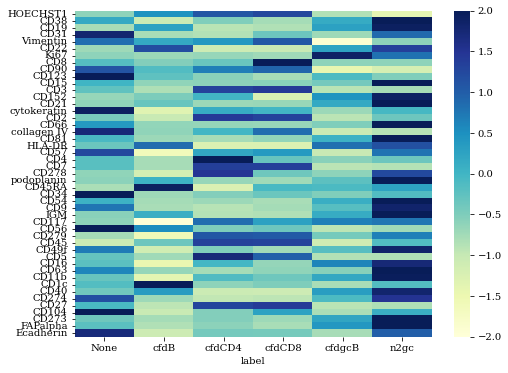

In [54]:
from scipy.stats import zscore

tmp = df_train.copy()
tmp = tmp.drop(['Unnamed: 0', 'cellLabelInImage', 'cellSize',
                "PointNum", "cluster.term","seurat_res1.0","xreg", "yreg",
               "cnngnn_label_res1","feature_label","cnngnn_annotation1",
               "feature_annotation1", "res1_flow", "res03_flow"], axis=1)
tmp = tmp.apply(zscore)
tmp['label'] = df_train['res1_flow']
tmp2 = tmp.groupby(by='label').mean()
sns.heatmap((stats.zscore(tmp2, axis=0, ddof=0)).T, cmap="YlGnBu", vmin=-2, vmax=2, yticklabels=True)

In [55]:
df_train['res1_flow'] = "None"

strange_idx = (df_train['cnngnn_annotation1'] == 'B') & (df_train['feature_annotation1'] != 'B')
df_train.loc[strange_idx,'res1_flow'] = 'B2nB'

strange2_idx = (df_train['cnngnn_annotation1'] != 'B') & (df_train['feature_annotation1'] == 'B')
df_train.loc[strange2_idx,'res1_flow'] = 'nB2B'

#### the confident ones
cfdb_idx = (df_train['cnngnn_annotation1'] == 'B') & (df_train['feature_annotation1'] == 'B')
df_train.loc[cfdb_idx,'res1_flow'] = 'cfdB'

cfdgcb_idx = (df_train['cnngnn_annotation1'] == 'gcB') & (df_train['cnngnn_annotation1'] == 'gcB')
df_train.loc[cfdgcb_idx,'res1_flow'] = 'cfdgcB'

cfdmph_idx = (df_train['cnngnn_annotation1'] == 'Mphage') & (df_train['cnngnn_annotation1'] == 'Mphage')
df_train.loc[cfdmph_idx,'res1_flow'] = 'cfdMphage'

cfdcd4_idx = (df_train['cnngnn_annotation1'] == 'CD4') & (df_train['feature_annotation1'] == "CD4")
df_train.loc[cfdcd4_idx,'res1_flow'] = 'cfdCD4'

cfdcd8_idx = (df_train['cnngnn_annotation1'] == 'CD8') & (df_train['feature_annotation1'] == 'CD8')
df_train.loc[cfdcd8_idx,'res1_flow'] = 'cfdCD8'

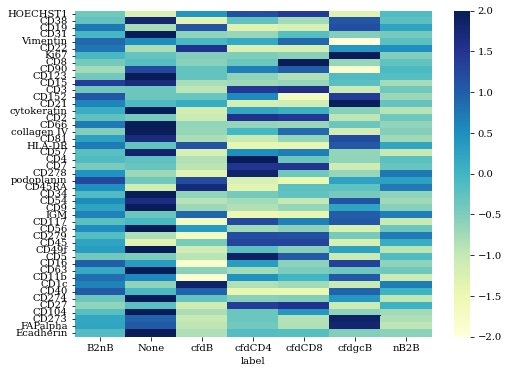

In [56]:
from scipy.stats import zscore

tmp = df_train.copy()
tmp = tmp.drop(['Unnamed: 0', 'cellLabelInImage', 'cellSize',
                "PointNum", "cluster.term","seurat_res1.0","xreg", "yreg",
               "cnngnn_label_res1","feature_label","cnngnn_annotation1",
               "feature_annotation1", "res1_flow", "res03_flow"], axis=1)
tmp = tmp.apply(zscore)
tmp['label'] = df_train['res1_flow']
tmp2 = tmp.groupby(by='label').mean()
sns.heatmap((stats.zscore(tmp2, axis=0, ddof=0)).T, cmap="YlGnBu", vmin=-2, vmax=2, yticklabels=True)

In [63]:
df_sub2 = df_train.loc[df_train.res1_flow.isin(['cfdgcB','cfdCD8','cfdCD4','cfdMphage','cfdB','B2nB', 'nB2B']),:]
df_sub2.columns

Index(['Unnamed: 0', 'cellLabelInImage', 'cellSize', 'HOECHST1', 'CD38',
       'CD19', 'CD31', 'Vimentin', 'CD22', 'Ki67', 'CD8', 'CD90', 'CD123',
       'CD15', 'CD3', 'CD152', 'CD21', 'cytokeratin', 'CD2', 'CD66',
       'collagen IV', 'CD81', 'HLA-DR', 'CD57', 'CD4', 'CD7', 'CD278',
       'podoplanin', 'CD45RA', 'CD34', 'CD54', 'CD9', 'IGM', 'CD117', 'CD56',
       'CD279', 'CD45', 'CD49f', 'CD5', 'CD16', 'CD63', 'CD11b', 'CD1c',
       'CD40', 'CD274', 'CD27', 'CD104', 'CD273', 'FAPalpha', 'Ecadherin',
       'PointNum', 'cluster.term', 'seurat_res1.0', 'xreg', 'yreg',
       'cnngnn_label_res1', 'feature_label', 'cnngnn_annotation1',
       'feature_annotation1', 'res1_flow', 'res03_flow'],
      dtype='object')

In [68]:
feature_adata = ad.AnnData(df_sub2.iloc[:,4:-11]) # remove meta info
sc.pp.scale(feature_adata)
sc.pp.neighbors(feature_adata, n_neighbors=15, use_rep='X')
sc.tl.umap(feature_adata)
#sc.tl.leiden(feature_adata, resolution=1)

/tmp/ipykernel_6811/2424029413.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  feature_adata = ad.AnnData(df_sub2.iloc[:,4:-11]) # remove meta info
/home/bkzhu/python/miniconda3/envs/spatial_cluster/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


NameError: name 'feature_adata_sub' is not defined

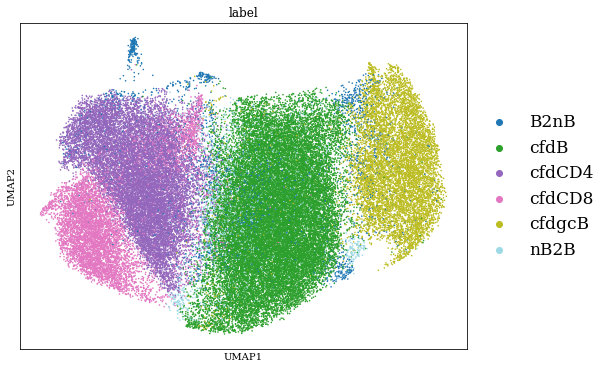

In [71]:
# plot
feature_adata.obs['label'] = list(df_sub2['res1_flow'])
plt.rcParams["figure.figsize"] = (8, 6)
sc.pl.umap(feature_adata, color='label', legend_fontsize=17, show=False, palette='tab20', s = 10)

In [65]:
cnngnn_sub = utils.drop_zero_variability_columns(cnngnn_embed[train_mask,:])
cnngnn_subsub = cnngnn_sub[df_train.res1_flow.isin(['cfdgcB','cfdCD8','cfdCD4','cfdMphage','cfdB','B2nB', 'nB2B']),:]
cnngnn_subsub.shape

(59977, 32)

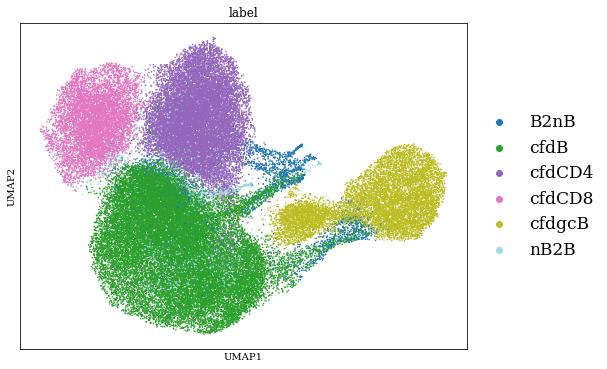

In [72]:
cnngnn_adata_sub = ad.AnnData(cnngnn_subsub) # remove meta info
sc.pp.scale(cnngnn_adata_sub)
sc.pp.neighbors(cnngnn_adata_sub, n_neighbors=15, use_rep='X')
sc.tl.umap(cnngnn_adata_sub)
sc.tl.leiden(cnngnn_adata_sub, resolution=0.1)
# plot
cnngnn_adata_sub.obs['label'] = list(df_sub2['res1_flow'])
plt.rcParams["figure.figsize"] = (8, 6)
sc.pl.umap(cnngnn_adata_sub, color='label', legend_fontsize=17, show=False, palette='tab20', s = 10)